## Download Exsiting Dataset and Seperate the Movie Items

If you want to reproduce the code, please download and extract the following dataset, and put it into the `data` folder.

- https://datasets.imdbws.com/title.basics.tsv.gz
- https://datasets.imdbws.com/title.crew.tsv.gz
- https://datasets.imdbws.com/title.ratings.tsv.gz

#### Because in raw title.basics there are not only movies, but also tv series and etc.

First we have to filter the data we wanted, to seperate the movies data part, the movie data will be stored in `movie_list.csv`.

In [5]:
from tqdm import tqdm

file_basics = open('../data/title.basics.tsv','r')
file_movie_list = open('../data/movie_list.tsv','w')

# write header
line = file_basics.readline().split('\t')
file_movie_list.write('\t'.join([line[0],line[2],line[5],line[7],line[8]]))

# filter out all the movies with available Year Run_time
for line in tqdm(file_basics):
    line = line.split('\t')
    if line[1] == 'movie' and line[2]!='\\N' and line[5]!='\\N' and line[7]!='\\N':
        file_movie_list.write('\t'.join([line[0],line[2],line[5],line[7],line[8]]))
file_basics.close()
file_movie_list.close()

6218835it [00:06, 996745.23it/s] 


### 1.2 Overview of the Movie Data

After we filter out movies, let us see the distribution of movies on Years and Run time

In [6]:
import pandas as pd
file_movie_list = pd.read_csv('../data/movie_list.tsv', delimiter='\t')
file_movie_list.describe()

,startYear,runtimeMinutes
count,329291.000000,329291.000000
mean,1992.112016,88.330622
std,25.882660,146.499533
min,1894.000000,1.000000
25%,1976.000000,72.000000
50%,2003.000000,88.000000
75%,2013.000000,100.000000
max,2022.000000,59460.000000


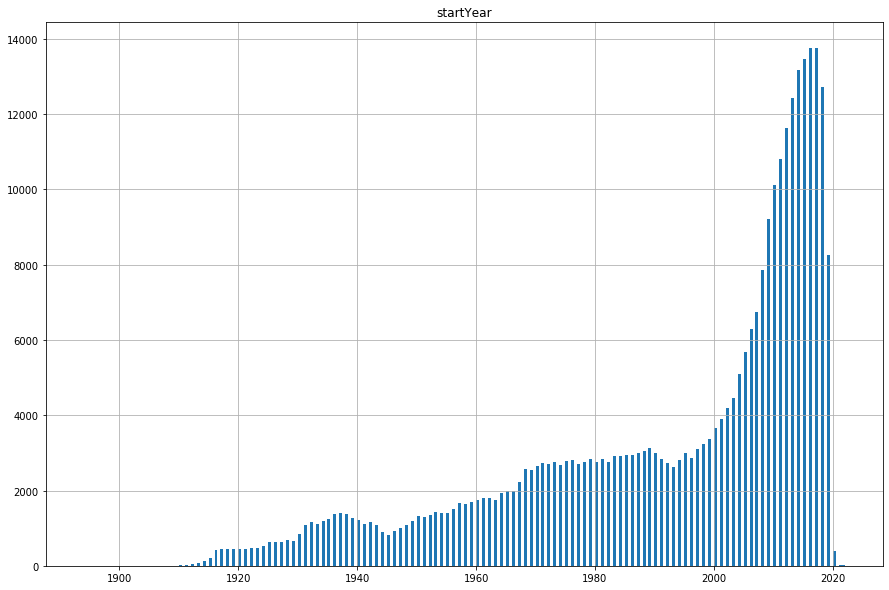

In [8]:
import matplotlib.pyplot as plt
file_movie_list.hist(column="startYear",figsize=(15,10),bins=256)
plt.show()

### 1.3 Select the movies from 2000 to 2018 and with run time between 1 hour to 3 hours 

According to the year distribution, we are going to keep the data which release years are between 2000 to 2018, and running times are between 60mins to 180 mins.

In [17]:
file_movie_list[(file_movie_list['startYear']>=2000) &
                (file_movie_list['startYear']<=2018) &
                (file_movie_list['runtimeMinutes']<=180) &
                (file_movie_list['runtimeMinutes']>=60)].to_csv(
    '../data/movie_2000_to_2018.tsv', sep='\t', index=None)

In [18]:
file_movie_list = pd.read_csv('../data/movie_2000_to_2018.tsv', delimiter='\t')
file_movie_list.describe()

,startYear,runtimeMinutes
count,140853.000000,140853.000000
mean,2011.176482,93.231049
std,4.991285,20.118494
min,2000.000000,60.000000
25%,2008.000000,80.000000
50%,2012.000000,90.000000
75%,2015.000000,102.000000
max,2018.000000,180.000000


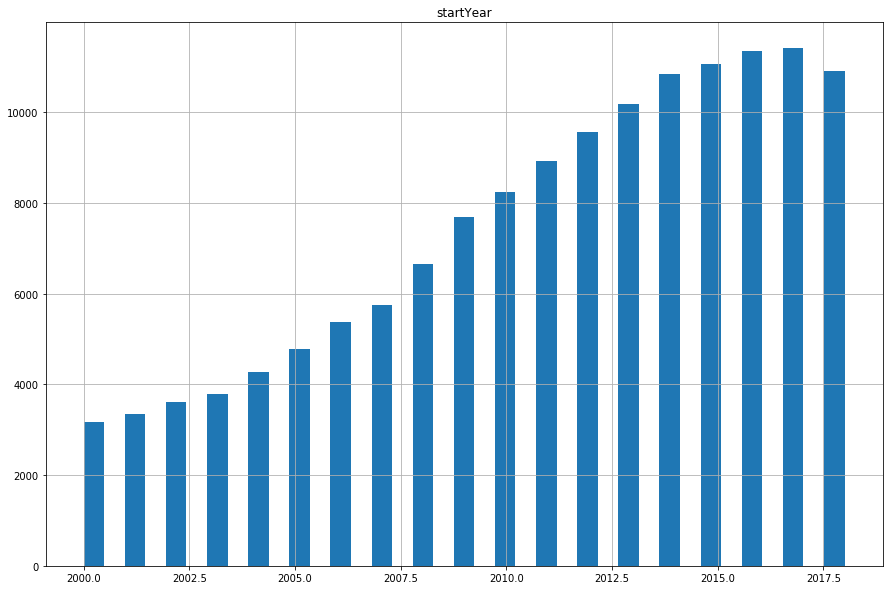

In [12]:
file_movie_list.hist(column="startYear",figsize=(15,10),bins=37)
plt.show()

### 1.4 Add Some Fields from Another Dataset

Then we add writers, directors from title.crew.tsv to this data set and save it to `movie_2000_to_2018_add_crew.tsv`.

In [15]:
file_crew = open('../data/title.crew.tsv','r')
file_movie_2000_to_2018 = open('../data/movie_2000_to_2018.tsv','r')
file_movie_2000_to_2018_add_crew = open('../data/movie_2000_to_2018_add_crew.tsv','w')
_ = file_crew.readline()
_ = file_movie_2000_to_2018.readline()
file_movie_2000_to_2018_add_crew.write("tconst	primaryTitle	startYear	runtimeMinutes	genres	directors	writers\n")
for line in tqdm(file_movie_2000_to_2018):
    tt = line.split('\t')[0]
    tt_num = int(tt.split('tt')[1] + '0' * (10-len(tt)))
    while True:
        line_crew = file_crew.readline()
        line_crew = line_crew.split('\t')
        crew_tt = line_crew[0]
        if int(crew_tt.split('tt')[1]+ '0' * (10-len(crew_tt))) >= tt_num:
            break    
    if int(crew_tt.split('tt')[1]+ '0' * (10-len(crew_tt))) > tt_num:
        continue  
    directors = line_crew[1]
    writers = line_crew[2].split('\n')[0]
    new_line = [line.split('\n')[0], directors, writers]
    new_line = '\t'.join(new_line) + '\n'
    file_movie_2000_to_2018_add_crew.write(new_line)
    
file_crew.close()
file_movie_2000_to_2018.close()
file_movie_2000_to_2018_add_crew.close() 

140853it [00:07, 18483.98it/s]


Then we add rating, numVoters from title.ratings.tsv to this data set and save it to `movie_2000_to_2018_add_crew_rating.tsv`.

In [16]:
file_ratings = open('../data/title.ratings.tsv','r')
file_movie_2000_to_2018_add_crew = open('../data/movie_2000_to_2018_add_crew.tsv','r')
file_movie_2000_to_2018_add_crew_rating = open('../data/movie_2000_to_2018_add_crew_rating.tsv','w')
_ = file_ratings.readline()
_ = file_movie_2000_to_2018_add_crew.readline()
file_movie_2000_to_2018_add_crew_rating.write("tconst	primaryTitle	startYear	runtimeMinutes	genres	directors	writers	ratings	numVoters\n")
for line in tqdm(file_movie_2000_to_2018_add_crew):
    tt = line.split('\t')[0]
    tt_num = int(tt.split('tt')[1] + '0' * (10-len(tt)))
    while True:
        line_ratings = file_ratings.readline()
        line_ratings = line_ratings.split('\t')
        ratings_tt = line_ratings[0]
        if int(ratings_tt.split('tt')[1]+ '0' * (10-len(ratings_tt))) >= tt_num:
            break    
    if int(ratings_tt.split('tt')[1]+ '0' * (10-len(ratings_tt))) > tt_num:
        continue  
    Rating = line_ratings[1]
    numVoters = line_ratings[2].split('\n')[0]
    new_line = [line.split('\n')[0], Rating, numVoters]
    new_line = '\t'.join(new_line) + '\n'
    file_movie_2000_to_2018_add_crew_rating.write(new_line)

file_ratings.close()
file_movie_2000_to_2018_add_crew.close()
file_movie_2000_to_2018_add_crew_rating.close()

140719it [00:01, 87971.48it/s]
